![Movie popcorn on red background](redpopcorn.jpg)

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions. This data does contain null values and some outliers, but handling these is out of scope for the project. Feel free to experiment after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [112]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Start coding!

## Load the CSV file and store as netflix_df.

In [113]:
# lets create a dataframe and check the header
netflix_df = pd.read_csv("netflix_data.csv")
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [114]:
# lets eximne the columns types
print(netflix_df.dtypes)


show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
duration         int64
description     object
genre           object
dtype: object


## Filter the data to remove TV shows and store as netflix_subset.

In [115]:
# TV shows are on the type column , meaning i should filter out these from the column
netflix_subset= netflix_df[netflix_df['type'] != 'TV Show'].reset_index(drop=True)

In [116]:
netflix_subset

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to ...",Horror Movies
...,...,...,...,...,...,...,...,...,...,...,...
5372,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,88,"Dragged from civilian life, a former superhero...",Children
5373,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,"October 19, 2020",2005,99,When Lebanon's Civil War deprives Zozo of his ...,Dramas
5374,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,111,A scrappy but poor boy worms his way into a ty...,Dramas
5375,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,44,"In this documentary, South African rapper Nast...",Documentaries


## Investigate and subset the Netflix movie data,
###  keeping only the columns "title", "country", "genre", "release_year", "duration", 
### and saving this into a new DataFrame called netflix_movies.

In [117]:
# create the netfilx_movies dataframe which only has title, country, genre, release_year , duration columns
netflix_movies = netflix_subset[['title', 'country', 'genre', 'release_year', 'duration']]
netflix_movies.head()

,title,country,genre,release_year,duration
0,7:19,Mexico,Dramas,2016,93
1,23:59,Singapore,Horror Movies,2011,78
2,9,United States,Action,2009,80
3,21,United States,Dramas,2008,123
4,122,Egypt,Horror Movies,2019,95


## Filter netflix_movies to find the movies that are strictly shorter than 60 minutes
### saving the resulting DataFrame as short_movies; 
### inspect the result to find possible contributing factors.

In [118]:
short_movies = netflix_movies[netflix_movies['duration'] < 60]
short_movies.head(11).reset_index(drop=True)

,title,country,genre,release_year,duration
0,#Rucker50,United States,Documentaries,2016,56
1,100 Things to do Before High School,United States,Uncategorized,2014,44
2,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
3,3 Seconds Divorce,Canada,Documentaries,2018,53
4,A 3 Minute Hug,Mexico,Documentaries,2019,28
5,A Christmas Special: Miraculous: Tales of Lady...,France,Uncategorized,2016,22
6,A Family Reunion Christmas,United States,Uncategorized,2019,29
7,A Go! Go! Cory Carson Christmas,United States,Children,2020,22
8,A Go! Go! Cory Carson Halloween,NaN,Children,2020,22
9,A Go! Go! Cory Carson Summer Camp,NaN,Children,2020,21


### from what i see ,i think the factor contributing to this is the genre and maybe the release year. 
### i will explore this further and lets find out !! 

In [119]:
# i needed to check the max release year, to know which year my data set is capped at 
netflix_df['release_year'].max()

2021

In [120]:
# count of each genre
doc_count = short_movies['genre'].value_counts()
doc_count

Documentaries           151
Children                107
Stand-Up                 72
Uncategorized            40
Comedies                 15
Dramas                   12
Classic Movies            8
Action                    6
International Movies      3
Anime Features            3
Music                     2
Horror Movies             1
Name: genre, dtype: int64

### OFC!! now we see most of the short movies are actually Documentaries and Children's movies.

## Using a for loop and if/elif statements,
### iterate through the rows of netflix_movies and assign colors of your choice to four genre groups ("Children", "Documentaries", "Stand-Up", and "Other" for everything else). 
### Save the results in a colors list. 
### Initialize a matplotlib figure object called fig and create a scatter plot for movie duration by release year using the colors list to color the points and using the labels "Release year" for the x-axis, "Duration (min)" for the y-axis, and the  title "Movie Duration by Year of Release"

Text(0.5, 1.0, 'Movie Duration by Year of Release')

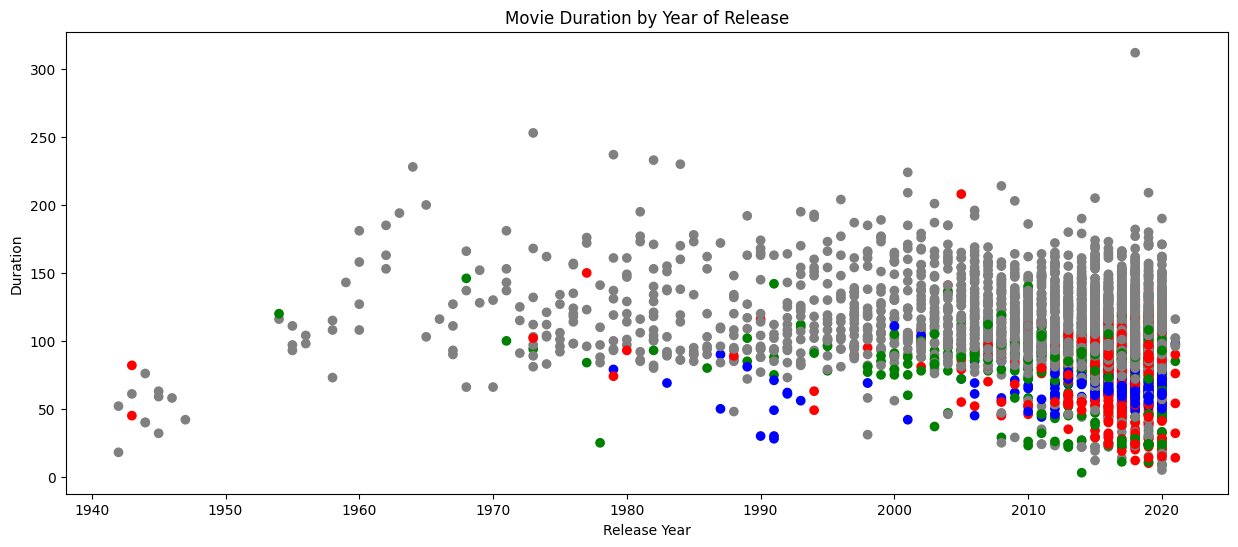

In [121]:
# colors i will be using Children : Green , Documentaries : red , Stand-Up : blue, everything else : black
colors = []
for genre in netflix_movies['genre']:
    if genre == 'Children':
        colors.append('green')
    elif genre == 'Documentaries':
        colors.append('red')
    elif genre == 'Stand-Up':
        colors.append('blue')
    else:
        colors.append('gray')

# plot the bar chart
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 6))
plt.scatter(netflix_movies['release_year'], netflix_movies['duration'], c=colors)
plt.xlabel('Release Year')
plt.ylabel('Duration')
plt.title('Movie Duration by Year of Release')


## After inspecting the plot, answer the question "Are we certain that movies are getting shorter?" by assigning either `"yes"` or `"no"` to the variable answer.


In [122]:
answer = "no"

### but i think we could get a clear answer by adding a trend_line to the chart 

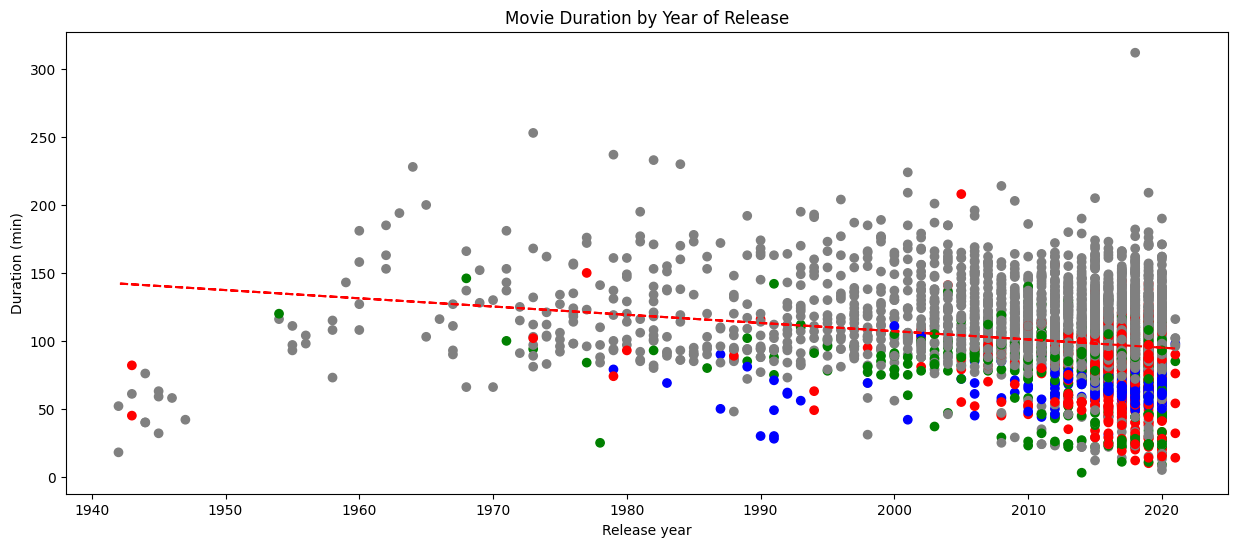

In [123]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(15, 6))
plt.scatter(netflix_movies['release_year'], netflix_movies['duration'], c=colors)

# Calculate the trendline (linear fit)
z = np.polyfit(netflix_movies['release_year'], netflix_movies['duration'], 1)
p = np.poly1d(z)

# Add the trendline
plt.plot(netflix_movies['release_year'], p(netflix_movies['release_year']), "r--")

plt.xlabel('Release year')
plt.ylabel('Duration (min)')
plt.title('Movie Duration by Year of Release')
plt.show()


### now anyone can tell , yes its getting slightly shorter.